## Some Additional Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd


import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

import datetime

import os
import time
from tqdm import tqdm

from utils import helper

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
homelocations_merged=pd.read_parquet('../data_created/homelocations_merged.parquet')

path = '../data/data_meta/'
chile_border_adm3 = gpd.read_file(os.path.join(path, 'borders/chl_admbnda_adm3_bcn_20211008.shp'))
incendio_gpd = gpd.read_file('../data/ED_AreasAfectadasIncendio_Valparaiso/ED_AreasAfectadasIncendio_Valparaiso.shp')
geo_antennas = gpd.read_file('../data/affected_btsid/affected_btsid.shp')

## Irregularity 1: Increased activities around Casablanca on 2-3 February (Not Affected, Medium SES)

In [3]:
df=homelocations_merged[(homelocations_merged['affected'] == 0)&(homelocations_merged['distance_km'] > 0)].dropna(subset=['home_bts_id','quantile_pop_bins_percent_bachelor_home']) 

In [4]:
df=df[(df['date']>='2024-01-21')&(df['date']<='2024-02-18')]

In [5]:
import numpy as np
from matplotlib.ticker import LogLocator, FuncFormatter

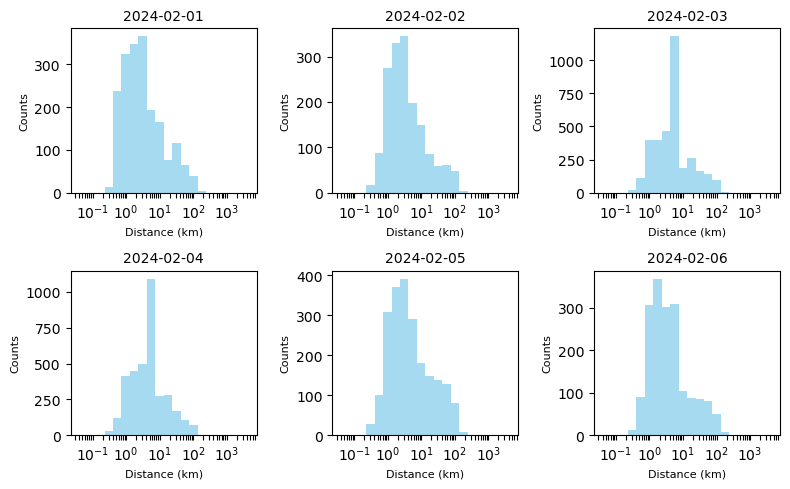

In [6]:
bin_edges_area = np.logspace(np.log10(df['distance_km'].min()), 
                             np.log10(df['distance_km'].max()), 
                             21)

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 5))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through each date and create a CDF plot for 'distance_km'
for i, date in enumerate(['2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05', '2024-02-06']):
    filtered_df = df[(df['quantile_pop_bins_percent_bachelor_home'] == 'Medium') & (df['date'] == date)]
    
    # Plot CDF for 'distance_km'
    sns.histplot(filtered_df['distance_km'], bins=bin_edges_area, color='skyblue', ax=axs[i])

    # Set the x-axis to logarithmic scale for each subplot
    axs[i].set_xscale('log')

    # Set the title, x-label, and y-label for each subplot
    axs[i].set_title(f'{date}', fontsize=10)
    axs[i].set_xlabel('Distance (km)', fontsize=8)
    axs[i].set_ylabel('Counts', fontsize=8)

    # Set custom x-axis ticks to show powers of 10 (10^0, 10^1, 10^2, etc.)
    axs[i].xaxis.set_major_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=5))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

3 and 4 of February between CQBG1, CASC2, and CASCE

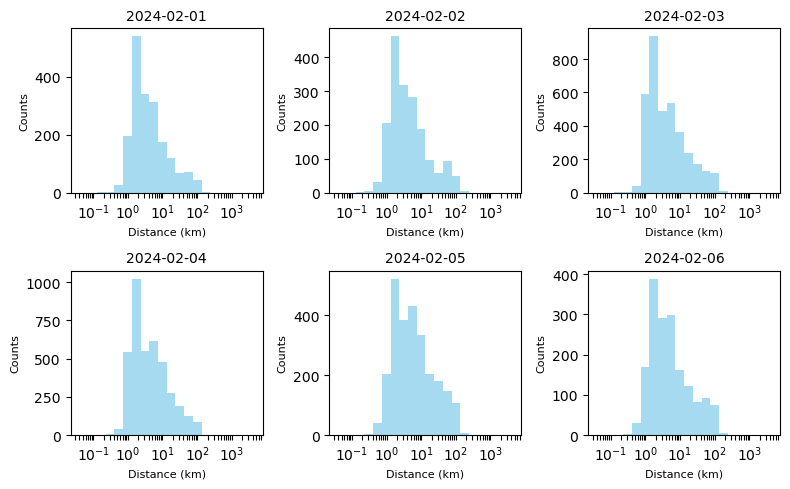

In [7]:
bin_edges_area = np.logspace(np.log10(df['distance_km'].min()), 
                             np.log10(df['distance_km'].max()), 
                             21)

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 5))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through each date and create a CDF plot for 'distance_km'
for i, date in enumerate(['2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05', '2024-02-06']):
    filtered_df = df[(df['quantile_pop_bins_percent_bachelor_home'] == 'Low') & (df['date'] == date)]
    
    # Plot CDF for 'distance_km'
    sns.histplot(filtered_df['distance_km'], bins=bin_edges_area, color='skyblue', ax=axs[i])

    # Set the x-axis to logarithmic scale for each subplot
    axs[i].set_xscale('log')

    # Set the title, x-label, and y-label for each subplot
    axs[i].set_title(f'{date}', fontsize=10)
    axs[i].set_xlabel('Distance (km)', fontsize=8)
    axs[i].set_ylabel('Counts', fontsize=8)

    axs[i].xaxis.set_major_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=5))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

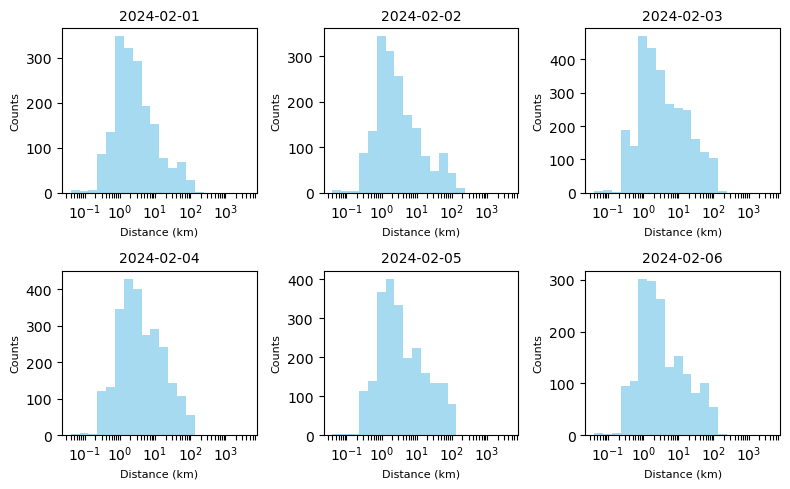

In [8]:
bin_edges_area = np.logspace(np.log10(df['distance_km'].min()), 
                             np.log10(df['distance_km'].max()), 
                             21)

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 5))
axs = axs.flatten()  # Flatten to make indexing easier

# Loop through each date and create a CDF plot for 'distance_km'
for i, date in enumerate(['2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05', '2024-02-06']):
    filtered_df = df[(df['quantile_pop_bins_percent_bachelor_home'] == 'High') & (df['date'] == date)]
    
    # Plot CDF for 'distance_km'
    sns.histplot(filtered_df['distance_km'], bins=bin_edges_area, color='skyblue', ax=axs[i])

    # Set the x-axis to logarithmic scale for each subplot
    axs[i].set_xscale('log')

    # Set the title, x-label, and y-label for each subplot
    axs[i].set_title(f'{date}', fontsize=10)
    axs[i].set_xlabel('Distance (km)', fontsize=8)
    axs[i].set_ylabel('Counts', fontsize=8)

    axs[i].xaxis.set_major_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=5))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [9]:
filtered_df = df[(df['quantile_pop_bins_percent_bachelor_home'] == 'Medium') & (df['date'] == '2024-02-03')]

In [10]:
filtered_df[(filtered_df['distance_km']>6)&(filtered_df['distance_km']<10)].distance_km.value_counts()

distance_km
7.10    901
6.32     31
8.06     14
6.65      9
8.31      7
       ... 
9.87      1
6.09      1
9.86      1
6.53      1
8.28      1
Name: count, Length: 104, dtype: int64

In [11]:
# Define the dates to filter
filter_date_27_01 = pd.to_datetime('2024-01-27')
filter_date_28_01 = pd.to_datetime('2024-01-28')
filter_date_03_02 = pd.to_datetime('2024-02-03')
filter_date_04_02 = pd.to_datetime('2024-02-04')

filtered_27_01 = homelocations_merged[
    (homelocations_merged['date'] == filter_date_27_01) &
    (homelocations_merged['current_bts_id'] == 'CQBG1') &
    (homelocations_merged['previous_bts_id'].isin(['CASCE', 'CASC2']))
]

filtered_28_01 = homelocations_merged[
    (homelocations_merged['date'] == filter_date_28_01) &
    (homelocations_merged['current_bts_id'].isin(['CASCE', 'CASC2'])&
    (homelocations_merged['previous_bts_id'].isin(['CQBG1'])))
]

# Combine the extracted rows
combined_rows_before = pd.concat([filtered_27_01, filtered_28_01])['PHONE_ID'].unique()

In [12]:
# Extract rows for 03.02.2024 where the tower is 'CQBG1'
rows_03_02 = homelocations_merged[
    (homelocations_merged['date'] == filter_date_03_02) &
    (homelocations_merged['current_bts_id'] == 'CQBG1') &
    (homelocations_merged['previous_bts_id'].isin(['CASCE', 'CASC2']))
]

# Extract rows for 04.02.2024 where the tower is either 'CASCE' or 'CASC2'
rows_04_02 = homelocations_merged[
    (homelocations_merged['date'] == filter_date_04_02) &
    (homelocations_merged['current_bts_id'].isin(['CASCE', 'CASC2'])&
    (homelocations_merged['previous_bts_id'].isin(['CQBG1'])))
]

# Combine the extracted rows
combined_rows = pd.concat([rows_03_02, rows_04_02])

combined_rows_cleaned = combined_rows[combined_rows['PHONE_ID'].isin(combined_rows_before)]

In [13]:
combined_rows.shape

(2657, 17)

In [14]:
combined_rows_cleaned.shape

(57, 17)

In [15]:
removed_ids=combined_rows[~combined_rows['PHONE_ID'].isin(combined_rows_before)]['PHONE_ID'].unique()

In [16]:
homelocations_merged_cleaned= (
    pd.concat([homelocations_merged.drop(combined_rows.index), combined_rows_cleaned])
    .sort_values('date')
    .reset_index(drop=True)
)

In [17]:
homelocations_merged_verycleaned = (
    homelocations_merged[~homelocations_merged['PHONE_ID'].isin(removed_ids)]
    .reset_index(drop=True)
)

In [18]:
homelocations_merged_imputation = (homelocations_merged[(homelocations_merged['PHONE_ID'].isin(removed_ids))
                                        &(homelocations_merged['date'].isin(['2024-01-27', '2024-01-28']))]
                                   .reset_index(drop=True)
                                  )

In [19]:
homelocations_merged_imputation['date']=homelocations_merged_imputation['date']+pd.Timedelta(weeks=1)

In [21]:
homelocations_merged_cleaned_imputed = (
    pd.concat([homelocations_merged_cleaned, homelocations_merged_imputation])
    .sort_values('date')
    .reset_index(drop=True)
)

In [22]:
(homelocations_merged[(homelocations_merged['affected'] == 0)&
                     (homelocations_merged['distance_km'] > 0)&
                     (homelocations_merged['date'] == '2024-02-03')]
.dropna(subset=['home_bts_id','quantile_pop_bins_percent_bachelor_home'])
 ['distance_km']
.median()
)

3.84

In [23]:
(homelocations_merged_verycleaned[(homelocations_merged_verycleaned['affected'] == 0)&
                     (homelocations_merged_verycleaned['distance_km'] > 0)&
                     (homelocations_merged_verycleaned['date'] == '2024-02-03')]
.dropna(subset=['home_bts_id','quantile_pop_bins_percent_bachelor_home'])
 ['distance_km']
.median()
)

3.04

In [24]:
(homelocations_merged_cleaned[(homelocations_merged_cleaned['affected'] == 0)&
                     (homelocations_merged_cleaned['distance_km'] > 0)&
                     (homelocations_merged_cleaned['date'] == '2024-02-03')]
.dropna(subset=['home_bts_id','quantile_pop_bins_percent_bachelor_home'])
 ['distance_km']
.median()
)

3.04

In [25]:
(homelocations_merged_cleaned_imputed[(homelocations_merged_cleaned_imputed['affected'] == 0)&
                     (homelocations_merged_cleaned_imputed['distance_km'] > 0)&
                     (homelocations_merged_cleaned_imputed['date'] == '2024-02-03')]
.dropna(subset=['home_bts_id','quantile_pop_bins_percent_bachelor_home'])
 ['distance_km']
.median()
)

3.06

In [26]:
def plot_logxhist(filtered_data, ax):

    bin_edges = np.logspace(np.log10(filtered_data['distance_km'].min()), 
                        np.log10(filtered_data['distance_km'].max()), 
                        num=30)  # Adjust the number of bins as needed
    

    # Calculate mean and median of the data
    mean_distance = filtered_data['distance_km'].mean()
    median_distance = filtered_data['distance_km'].median()
    
    # Plot histogram
    ax.hist(filtered_data['distance_km'], bins=bin_edges, edgecolor='black')
    
    # Set x-axis to logarithmic scale
    ax.set_xscale('log')
    
    # Add vertical lines for mean and median
    ax.axvline(mean_distance, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_distance:.2f} km')
    ax.axvline(median_distance, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_distance:.2f} km')
    
    # Add labels and title
    ax.set_xlabel('Distance (km)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title('Histogram of Distance with Logarithmic X-axis', fontsize=16)
    
    # Add legend
    ax.legend()


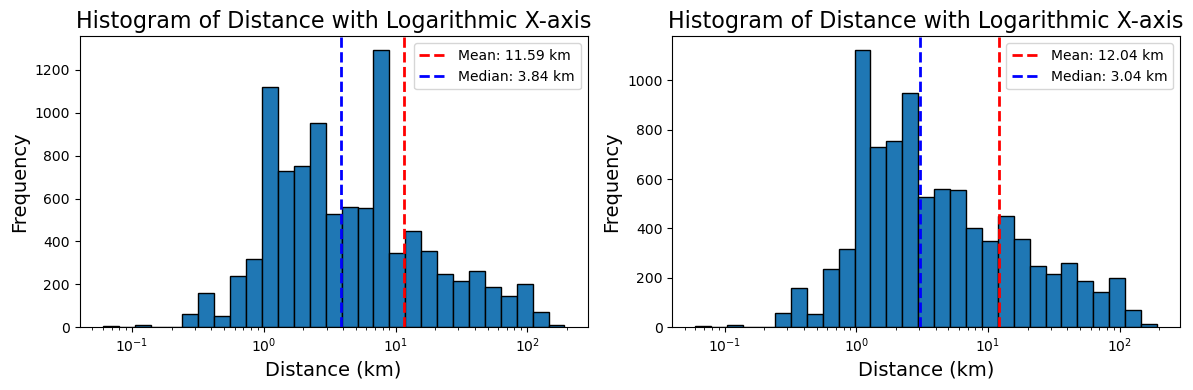

In [27]:
# Filter and drop NaN values
filtered_data1 = homelocations_merged[
    (homelocations_merged['affected'] == 0) &
    (homelocations_merged['distance_km'] > 0) &
    (homelocations_merged['date'] == '2024-02-03')
].dropna(subset=['home_bts_id', 'quantile_pop_bins_percent_bachelor_home'])

# Filter and drop NaN values
filtered_data2 = homelocations_merged_cleaned[
    (homelocations_merged_cleaned['affected'] == 0) &
    (homelocations_merged_cleaned['distance_km'] > 0) &
    (homelocations_merged_cleaned['date'] == '2024-02-03')
].dropna(subset=['home_bts_id', 'quantile_pop_bins_percent_bachelor_home'])
    

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_logxhist(filtered_data1, ax=axs[0])
plot_logxhist(filtered_data2, ax=axs[1])

plt.tight_layout()
plt.show()

In [28]:
def plot_logyhist(filtered_data, ax):

    # bin_edges = np.logspace(np.log10(filtered_data['distance_km'].min()), 
    #                     np.log10(filtered_data['distance_km'].max()), 
    #                     num=30)  # Adjust the number of bins as needed
    

    # Calculate mean and median of the data
    mean_distance = filtered_data['distance_km'].mean()
    median_distance = filtered_data['distance_km'].median()
    
    # Plot histogram
    ax.hist(filtered_data['distance_km'], bins=30, edgecolor='black')
    
    # Set x-axis to logarithmic scale
    ax.set_yscale('log')
    
    # Add vertical lines for mean and median
    ax.axvline(mean_distance, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_distance:.2f} km')
    ax.axvline(median_distance, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_distance:.2f} km')
    
    # Add labels and title
    ax.set_xlabel('Log Distance (km)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title('Histogram of Distance with Logarithmic Y-axis', fontsize=16)
    
    # Add legend
    ax.legend()

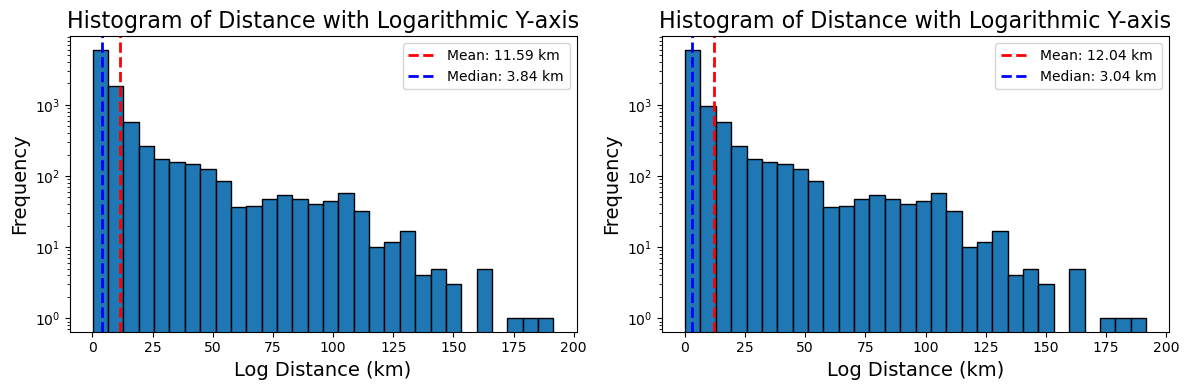

In [29]:
# Filter and drop NaN values
filtered_data1 = homelocations_merged[
    (homelocations_merged['affected'] == 0) &
    (homelocations_merged['distance_km'] > 0) &
    (homelocations_merged['date'] == '2024-02-03')
].dropna(subset=['home_bts_id', 'quantile_pop_bins_percent_bachelor_home'])

# Filter and drop NaN values
filtered_data2 = homelocations_merged_cleaned[
    (homelocations_merged_cleaned['affected'] == 0) &
    (homelocations_merged_cleaned['distance_km'] > 0) &
    (homelocations_merged_cleaned['date'] == '2024-02-03')
].dropna(subset=['home_bts_id', 'quantile_pop_bins_percent_bachelor_home'])
    

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_logyhist(filtered_data1, ax=axs[0])
plot_logyhist(filtered_data2, ax=axs[1])

plt.tight_layout()
plt.show()

In [30]:
def plot_hist(filtered_data, ax):

    # bin_edges = np.logspace(np.log10(filtered_data['distance_km'].min()), 
    #                     np.log10(filtered_data['distance_km'].max()), 
    #                     num=30)  # Adjust the number of bins as needed
    

    # Calculate mean and median of the data
    mean_distance = filtered_data['distance_km'].mean()
    median_distance = filtered_data['distance_km'].median()
    
    # Plot histogram
    ax.hist(filtered_data['distance_km'], bins=30, edgecolor='black')
    
    # Add vertical lines for mean and median
    ax.axvline(mean_distance, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_distance:.2f} km')
    ax.axvline(median_distance, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_distance:.2f} km')
    
    # Add labels and title
    ax.set_xlabel('Log Distance (km)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title('Histogram of Distance with Regular Axes', fontsize=16)
    
    # Add legend
    ax.legend()

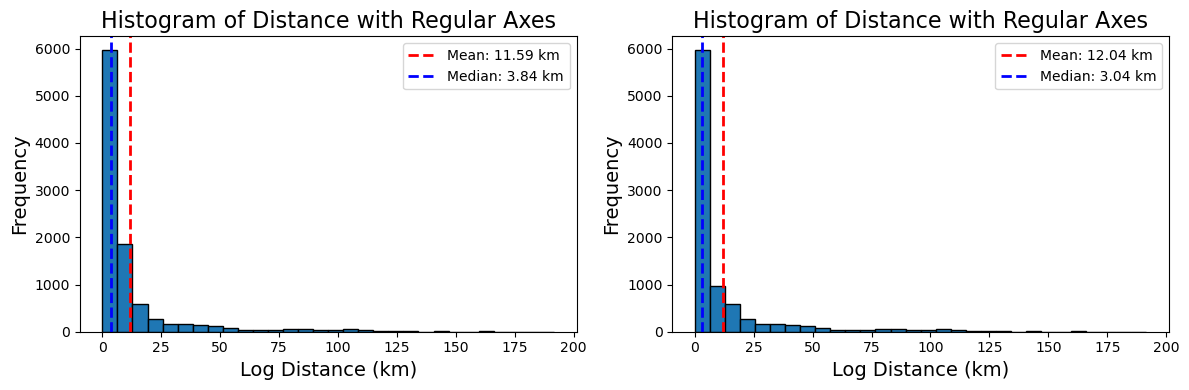

In [31]:
# Filter and drop NaN values
filtered_data1 = homelocations_merged[
    (homelocations_merged['affected'] == 0) &
    (homelocations_merged['distance_km'] > 0) &
    (homelocations_merged['date'] == '2024-02-03')
].dropna(subset=['home_bts_id', 'quantile_pop_bins_percent_bachelor_home'])

# Filter and drop NaN values
filtered_data2 = homelocations_merged_cleaned[
    (homelocations_merged_cleaned['affected'] == 0) &
    (homelocations_merged_cleaned['distance_km'] > 0) &
    (homelocations_merged_cleaned['date'] == '2024-02-03')
].dropna(subset=['home_bts_id', 'quantile_pop_bins_percent_bachelor_home'])
    

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_hist(filtered_data1, ax=axs[0])
plot_hist(filtered_data2, ax=axs[1])

plt.tight_layout()
plt.show()

In [ ]:
## Saving corrected dataset
# homelocations_merged_cleaned.to_parquet('../data_created/homelocations_merged_cleaned.parquet')

## Irregularity 2: Weird Activity Patterns on 15 and 17 February (Low SES, Likely Evacuated)

In [33]:
import contextily as ctx

In [34]:
# Ensure all datasets are in the same CRS (EPSG:3857 for basemap)
chile_border_adm3 = chile_border_adm3.to_crs(epsg=3857)
incendio_gpd = incendio_gpd.to_crs(epsg=3857)
geo_antennas = geo_antennas.to_crs(epsg=3857)

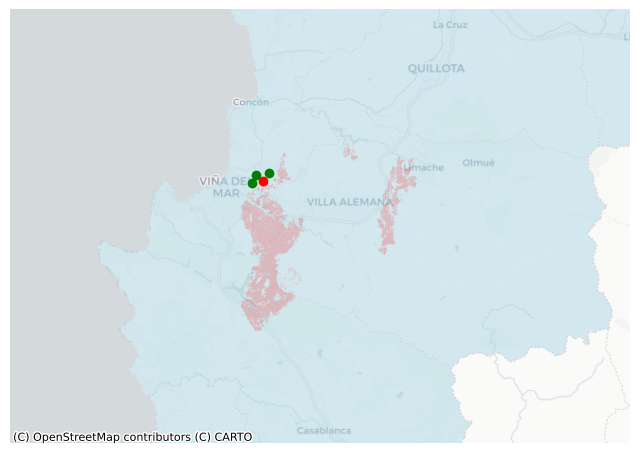

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))  

## Main Figure
chile_border_adm3[chile_border_adm3['ADM1_ES'] == 'Región de Valparaíso'].plot(color='lightblue', ax=ax, alpha=0.5)
incendio_gpd.plot(color='red', alpha=0.2, ax=ax)
geo_antennas[geo_antennas['bts_id'].isin(['MALTF'])].plot(ax=ax, color='red')
geo_antennas[geo_antennas['bts_id'].isin(['MRFG1', 'VISAC', 'PALOS'])].plot(ax=ax, color='green')

ax.set_xlim([-0.8*1e7, -0.79*1e7])
ax.set_ylim([-3.94*1e6, -3.87*1e6])
ax.set_axis_off()

# Add basemap to the main figure
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.show();

In [36]:
geo_antennas[geo_antennas['bts_id'].isin(['MALTF'])].to_crs('4238')

bts_id  codregion  codcom category                     geometry
1748  MALTF          5    5109     BMFB  POINT (-71.49874 -33.01812)

In [ ]:
(homelocations_merged[['PHONE_ID','home_bts_id','quantile_pop_bins_percent_bachelor_home']]
 .drop_duplicates()
 .dropna(subset=['home_bts_id','quantile_pop_bins_percent_bachelor_home'])
 .reset_index(drop=True)
 .groupby(['home_bts_id'])
 .agg({'PHONE_ID':'count',
       'quantile_pop_bins_percent_bachelor_home':'first'})
 .reset_index()
).to_csv('../data_created/towers_inhabitants.csv')

In [43]:
towers_inhabitants=pd.read_csv('../data_created/towers_inhabitants.csv')
towers_intervals=pd.read_parquet('../data/fires_valpo_15minintervals_part000000000000.parquet')

In [44]:
towers_inhabitants[towers_inhabitants['home_bts_id']=='OCREA']

Unnamed: 0 home_bts_id  PHONE_ID quantile_pop_bins_percent_bachelor_home
236         236       OCREA       899                                  Medium

<Axes: xlabel='interval_start'>

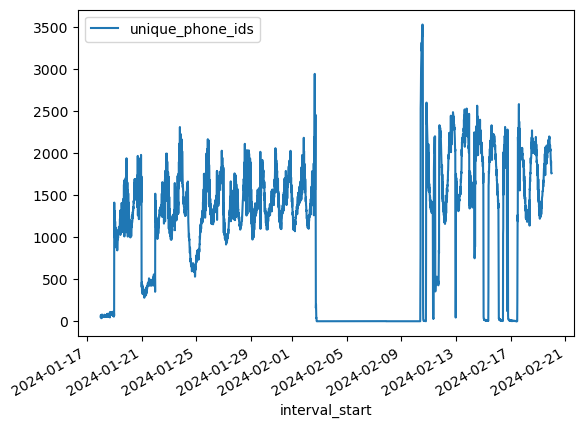

In [45]:
towers_intervals[towers_intervals['bts_id']=='MALTF'].plot(x='interval_start', y='unique_phone_ids')

In [46]:
towers_intervals['hour']=towers_intervals['interval_start'].dt.hour
towers_intervals['day']=towers_intervals['interval_start'].dt.date

In [47]:
towers_intervals

bts_id      interval_start  unique_phone_ids  hour         day
0        11NLI 2024-01-18 00:00:00                14     0  2024-01-18
1        11NLI 2024-01-18 00:15:00                11     0  2024-01-18
2        11NLI 2024-01-18 00:30:00                18     0  2024-01-18
3        11NLI 2024-01-18 00:45:00                12     0  2024-01-18
4        11NLI 2024-01-18 01:00:00                17     1  2024-01-18
...        ...                 ...               ...   ...         ...
1757412  ZAPAF 2024-02-19 22:45:00               447    22  2024-02-19
1757413  ZAPAF 2024-02-19 23:00:00               484    23  2024-02-19
1757414  ZAPAF 2024-02-19 23:15:00               435    23  2024-02-19
1757415  ZAPAF 2024-02-19 23:30:00               451    23  2024-02-19
1757416  ZAPAF 2024-02-19 23:45:00               429    23  2024-02-19

[1757417 rows x 5 columns]

In [49]:
(homelocations_merged_cleaned[(homelocations_merged_cleaned['home_bts_id']=='MALTF')
                            &(homelocations_merged_cleaned['date'].isin(['2024-02-15','2024-02-17']))
                            &(homelocations_merged_cleaned['current_bts_id']!='MALTF')
                            &(homelocations_merged_cleaned['distance_km']<2)]
.groupby('date')
['PHONE_ID']
.count()
)

# Exclude them

date
2024-02-15    670
2024-02-17    700
Name: PHONE_ID, dtype: int64

In [50]:
phone_ids_exclude= (homelocations_merged_cleaned[(homelocations_merged_cleaned['home_bts_id']=='MALTF')
                        &(homelocations_merged_cleaned['date'].isin(['2024-02-15','2024-02-17']))
                        &(homelocations_merged_cleaned['current_bts_id']!='MALTF')
                        &(homelocations_merged_cleaned['distance_km']<2)]
                    ['PHONE_ID']
                    .unique()
                    )

In [51]:
homelocations_merged_cleaned=homelocations_merged_cleaned[~((homelocations_merged_cleaned['PHONE_ID'].isin(phone_ids_exclude))&(homelocations_merged_cleaned['date'].isin(['2024-02-15','2024-02-17'])))]


In [52]:
# Saving corrected dataset
homelocations_merged_cleaned.to_parquet('../data_created/homelocations_merged_cleaned.parquet')

In [119]:
def print_movements(homelocations_warned_frac2, date):

    df=(homelocations_warned_frac2[(homelocations_warned_frac2['quantile_pop_bins_percent_bachelor_home']=='Low')
                            &(homelocations_warned_frac2['date']==date)
                            &(homelocations_warned_frac2['home_bts_id']==homelocations_warned_frac2['previous_bts_id'])
                            &(homelocations_warned_frac2['home_bts_id']!=homelocations_warned_frac2['current_bts_id'])]
    .groupby(['home_bts_id','current_bts_id'])
     ['PHONE_ID']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    )
    return df

def print_towers(homelocations_warned_frac2, date):

    df=(homelocations_warned_frac2[(homelocations_warned_frac2['quantile_pop_bins_percent_bachelor_home']=='Low')
                            &(homelocations_warned_frac2['date']==date)
                            &(homelocations_warned_frac2['home_bts_id']==homelocations_warned_frac2['previous_bts_id'])
                            &(homelocations_warned_frac2['home_bts_id']!=homelocations_warned_frac2['current_bts_id'])]
    .groupby(['home_bts_id'])
     ['PHONE_ID']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    )
    return df


In [128]:
print_towers(homelocations_warned_frac2, date='2024-02-07')

home_bts_id  PHONE_ID
0        MALTF      1094
1        PALOS       492
2        GLONA       242
3        HCHOR        66
4        ARCOS        64
5        QLPVO        56
6        ASANF        46
7        REALT        43
8        MIAUR        43
9        PRATO        33
10       QLTC1        31
11       HTFOR        28
12       VALPE        28
13       TVENT        27
14       VISAC        23
15       SPEDR        19
16       HACHU        17
17       ROSNQ        16
18       ROTSJ        15
19       RASVM        13
20       NUEAN         8
21       HREA1         5
22       HALG1         4

In [94]:
print_movements(homelocations_warned_frac2, date='2024-02-15')

home_bts_id current_bts_id  PHONE_ID
0         MALTF          MRFG1       229
1         MALTF          VISAC       109
2         MALTF          PALOS        72
3         MALTF          OCREA        72
4         MALTF          HCHOR        53
..          ...            ...       ...
303       MALTF          HONAV         1
304       MALTF          JMARF         1
305       MALTF          LPINF         1
306       MALTF          LUSIT         1
307       VISAC          STAIA         1

[308 rows x 3 columns]

In [90]:
print_towers(homelocations_warned_frac2, date='2024-02-16')

home_bts_id  PHONE_ID
0        ASANF        34
1        PALOS        30
2        ARCOS        21
3        MIAUR        18
4        HCHOR        18
5        QLPVO        17
6        GLONA        17
7        TVENT        16
8        SPEDR        14
9        VISAC        14
10       HTFOR        13
11       REALT        13
12       QLTC1        12
13       ROSNQ        12
14       VALPE        12
15       PRATO        11
16       ROTSJ         9
17       RASVM         6
18       MALTF         5
19       NUEAN         4

In [110]:
(homelocations_warned_frac2[(homelocations_warned_frac2['quantile_pop_bins_percent_bachelor_home']=='Low')
                            &(homelocations_warned_frac2['date']=='2024-02-16')
                            &(homelocations_warned_frac2['home_bts_id']==homelocations_warned_frac2['previous_bts_id'])
                            &(homelocations_warned_frac2['home_bts_id']!=homelocations_warned_frac2['current_bts_id'])]
.groupby(['home_bts_id','current_bts_id'])
 ['PHONE_ID']
.count()
.sort_values(ascending=False)
.reset_index()
 ['PHONE_ID'].sum()
)

296